## Command-line code for scraping Instagram posts

### Activate your working environment:
#### conda activate (insert environment name)

### Install necessary package:
#### pip3 install instagram-scraper
#### Documentation: https://github.com/rarcega/instagram-scraper

### - a hashtag
#### instagram-scraper (insert tag) --tag -d C:/Users/jfeng/InstagramKDE -n -t image --maximum 1000 --media-metadata --include-location --profile-metadata --comments

### - a location
#### instagram-scraper (insert location-id without #) --location --maximum 50 --media-metadata --include-location --profile-metadata --comments

In [2]:
# Load packages
from os import path
from PIL import Image
import numpy as np
import os
import pandas as pd
import json
from pandas.io.json import json_normalize
import datetime as dt
import os
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [92]:
from nltk.corpus import stopwords
from textblob import TextBlob, Word
stop = stopwords.words('english')

# Read json file and parse relevant information into a pandas data frame
def igjsontopandas(jsonfile, filepath):
    with open(jsonfile, encoding = 'utf-8') as f:
        d = json.load(f)
    
    global df
    df = pd.DataFrame()
    df = json_normalize(d['GraphImages'], max_level = 10)
    df["caption"] = [df["edge_media_to_caption.edges"][i][0]["node"]['text'] if (len(df["edge_media_to_caption.edges"][i]) > 0) else "" for i in range(len(df))]
    df["taken_at_timestamp"] = [dt.datetime.fromtimestamp(post).strftime("%Y-%m-%d %H:%M:%S") for post in df["taken_at_timestamp"]]
    
    # Number of words; generally, smaller word counts indicate more negative sentiment
    df['word_count'] = df['caption'].apply(lambda x: len(str(x).split(" ")))
    # Number of characters with spaces removed; same logic from retrieving number of word applies -- smaller number of characters may suggest negative sentiment of the post
    df['char_count'] = df['caption'].apply(lambda x: len(x.replace(" ","")))
    # Words in all caps may suggest strong sentiment
    df['upper'] = df['caption'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
    # Let's make them all words in the caption lower-case so we can process for redundant words
    df['caption_lower'] = df['caption'].apply(lambda x: " ".join(x.lower() for x in x.split()))
    # Now, remove punctuation
    df['caption_lower'] = df['caption_lower'].str.replace('[^\w\s]','')
    # Remove stop words
    df['caption_lower'] = df['caption_lower'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
    # Lemmatize words; convert words into their respective root words
    df['caption_lower'] = df['caption_lower'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
    # Spelling correction
    df['caption_lower'] = df['caption_lower'].apply(lambda x: str(TextBlob(x).correct()))
    # Polarity
    df['polarity'] = df['caption_lower'].apply(lambda x: TextBlob(x).sentiment[0])
    # Subjectivity
    df['subjectivity'] = df['caption_lower'].apply(lambda x: TextBlob(x).sentiment[1])
    
    df.to_csv(filepath)

In [93]:
# Create word cloud function

stopwords = set(STOPWORDS)
stopwords.add("said")

def igpandastowordcloud(pandasdf, community):
    global masterstr
    masterstr = df.caption_lower.str.cat()
    wc = WordCloud(background_color="white", max_words=100,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')

    # generate word cloud
    wc.generate(masterstr)

    # store to file
    wc.to_file("./Instagram/WordCloud/{}.png".format(community))

    # show
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.figure()
    #plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
    #plt.axis("off")
    plt.show()

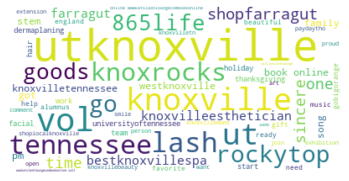

<Figure size 432x288 with 0 Axes>

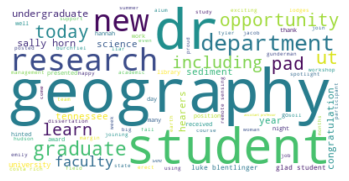

<Figure size 432x288 with 0 Axes>

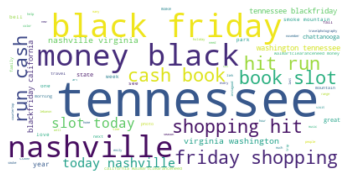

<Figure size 432x288 with 0 Axes>

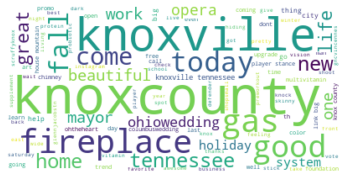

<Figure size 432x288 with 0 Axes>

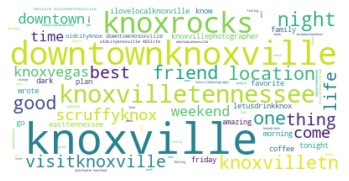

<Figure size 432x288 with 0 Axes>

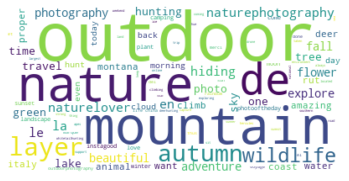

<Figure size 432x288 with 0 Axes>

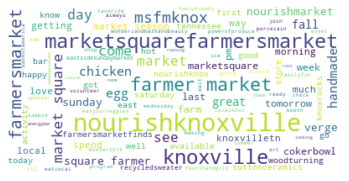

<Figure size 432x288 with 0 Axes>

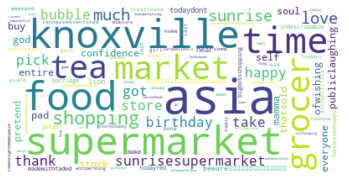

<Figure size 432x288 with 0 Axes>

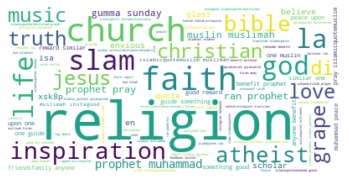

<Figure size 432x288 with 0 Axes>

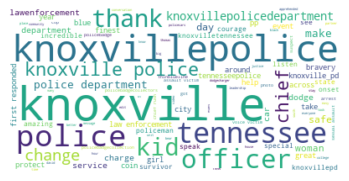

<Figure size 432x288 with 0 Axes>

In [94]:
communities = ["utknoxville",
             "utkgeography",
             "tennessee",
             "knoxcounty",
             "downtownknoxville",
             "outdoors",
             "nourishknoxville",
             "sunrisesupermarket",
             "religion",
             "knoxvillepolice"]


for i in range(len(communities)):
    igjsontopandas("./Instagram/{}/{}.json".format(communities[i], communities[i]), "./Instagram/TextAnalysis/{}.csv".format(communities[i]))
    igpandastowordcloud(df, communities[i])

In [89]:
from nltk.corpus import stopwords
from textblob import TextBlob, Word
stop = stopwords.words('english')

def textprocessing(jsonfile, filepath):
    with open(jsonfile, encoding = 'utf-8') as f:
        d = json.load(f)
    
    global df
    df = pd.DataFrame()
    df = json_normalize(d['GraphImages'], max_level = 10)
    df["caption"] = [df["edge_media_to_caption.edges"][i][0]["node"]['text'] if (len(df["edge_media_to_caption.edges"][i]) > 0) else "" for i in range(len(df))]
    
    global df
    df = df[["caption"]]
    # Number of words; generally, smaller word counts indicate more negative sentiment
    df['word_count'] = df['caption'].apply(lambda x: len(str(x).split(" ")))
    # Number of characters with spaces removed; same logic from retrieving number of word applies -- smaller number of characters may suggest negative sentiment of the post
    df['char_count'] = df['caption'].apply(lambda x: len(x.replace(" ","")))
    # Words in all caps may suggest strong sentiment
    df['upper'] = df['caption'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
    # Let's make them all words in the caption lower-case so we can process for redundant words
    df['caption_lower'] = df['caption'].apply(lambda x: " ".join(x.lower() for x in x.split()))
    # Now, remove punctuation
    df['caption_lower'] = df['caption_lower'].str.replace('[^\w\s]','')
    # Remove stop words
    df['caption_lower'] = df['caption_lower'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
    # Lemmatize words; convert words into their respective root words
    df['caption_lower'] = df['caption_lower'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
    # Spelling correction
    df['caption_lower'] = df['caption_lower'].apply(lambda x: str(TextBlob(x).correct()))
    # Polarity
    df['polarity'] = df['caption_lower'].apply(lambda x: TextBlob(x).sentiment[0])
    # Subjectivity
    df['subjectivity'] = df['caption_lower'].apply(lambda x: TextBlob(x).sentiment[1])
    # Save to a .csv
    df.to_csv(filepath)

In [91]:
communities = ["utknoxville",
             "utkgeography",
             "tennessee",
             "knoxcounty",
             "downtownknoxville",
             "outdoors",
             "nourishknoxville",
             "sunrisesupermarket",
             "religion",
             "knoxvillepolice"]

for i in range(len(communities)):
    textprocessing("./Instagram/{}/{}.json".format(communities[i], communities[i]), "./Instagram/TextAnalysis/{}.csv".format(communities[i]))

                                              caption  word_count  char_count  \
0   Wishing @cahillj77 luck as he heads off to col...          18          93   
1   Congratulations to @laur_akins on being honore...          56         368   
2   #tbt to the time @garthbrooks played everyone’...          25         186   
3   ᶜᵒˡᵈ ᵇʳᵉʷ ʷⁱᵗʰ ᵉˣᵗʳᵃ ᶜʳᵉᵃᵐ, ᵖˡᵉᵃˢᵉ☕️🍶 Balayage...          54         254   
4   “my Xbox username was EmmaWatson69” - @matt_ma...           7          45   
5   So don’t normally ask for likes like this but ...          41         317   
6   Former 5⭐ Aubrey Solomon has been granted imme...          29         155   
7   At least we won the tailgate! 🏈🍊\n#utknoxville...          13          83   
8   I. BLEED. ORANGE. •\n•\n•\n•\nIt’s been a roug...          23         143   
9   Give the gift of youthful skincare.  These bea...          45         433   
10  this girl - and her lashes - are weekend ready...          63         502   
11  Give the gift of amazing

In [118]:
communities = ["utknoxville",
             "utkgeography",
             "tennessee",
             "knoxcounty",
             "downtownknoxville",
             "outdoors",
             "nourishknoxville",
             "sunrisesupermarket",
             "religion",
             "knoxvillepolice"]

textfile = pd.DataFrame(columns=file.columns)

for i in range(len(communities)):
    file = pd.read_csv("./Instagram/TextAnalysis/{}.csv".format(communities[i]))
    file["community"] = "{}".format(communities[i])
    textfile = textfile.append(file)
    #boxplot = file.boxplot(column=["polarity", "subjectivity", "word_count"], grid=False, rot=45, fontsize=15)
textfile

,Unnamed: 0,__typename,caption,caption_lower,char_count,comments.data,comments_disabled,community,dimensions.height,dimensions.width,...,subjectivity,tags,taken_at_timestamp,thumbnail_resources,thumbnail_src,upper,urls,username,video_view_count,word_count
0,0,NaN,Wishing @cahillj77 luck as he heads off to col...,wishing cahillj77 luck head college today got ...,93,NaN,NaN,utknoxville,1080,1080,...,0.500000,['UTKnoxville'],2019-08-18 13:40:45,"[{'config_height': 150, 'config_width': 150, '...",https://instagram.fbna1-1.fna.fbcdn.net/v/t51....,0,['https://instagram.fbna1-1.fna.fbcdn.net/v/t5...,NaN,NaN,18
1,1,NaN,Congratulations to @laur_akins on being honore...,congratulation laur_akins honored 2019 alumnus...,368,NaN,NaN,utknoxville,1350,1080,...,0.550000,"['LinkInBio', 'govols', 'utknoxville', 'utk', ...",2019-11-20 13:00:16,"[{'config_height': 150, 'config_width': 150, '...",https://instagram.fbna1-1.fna.fbcdn.net/v/t51....,0,['https://instagram.fbna1-1.fna.fbcdn.net/v/t5...,NaN,NaN,56
2,2,NaN,#tbt to the time @garthbrooks played everyone’...,tut time garthbrooks played everyone favorite ...,186,NaN,NaN,utknoxville,421,750,...,1.000000,"['tbt', 'RockyTop', 'newvols', 'country', 'utk...",2019-11-21 16:39:16,"[{'config_height': 150, 'config_width': 150, '...",https://instagram.fbna1-2.fna.fbcdn.net/v/t51....,0,['https://instagram.fbna1-2.fna.fbcdn.net/v/t5...,NaN,605.0,25
3,3,NaN,"ᶜᵒˡᵈ ᵇʳᵉʷ ʷⁱᵗʰ ᵉˣᵗʳᵃ ᶜʳᵉᵃᵐ, ᵖˡᵉᵃˢᵉ☕️🍶 Balayage...",ᶜᵒˡᵈ ᵇʳᵉʷ ʷⁱᵗʰ ᵉˣᵗʳᵃ ᶜʳᵉᵃᵐ ᵖˡᵉᵃˢᵉ balayage bab...,254,NaN,NaN,utknoxville,1350,1080,...,0.000000,[],2019-11-05 17:04:04,"[{'config_height': 150, 'config_width': 150, '...",https://instagram.fbna1-1.fna.fbcdn.net/v/t51....,0,['https://instagram.fbna1-1.fna.fbcdn.net/v/t5...,NaN,NaN,54
4,4,NaN,“my Xbox username was EmmaWatson69” - @matt_ma...,box surname emmawatson69 matt_maguire,45,NaN,NaN,utknoxville,1350,1080,...,0.000000,[],2019-10-05 17:49:57,"[{'config_height': 150, 'config_width': 150, '...",https://instagram.fbna1-2.fna.fbcdn.net/v/t51....,0,['https://instagram.fbna1-2.fna.fbcdn.net/v/t5...,NaN,NaN,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,45,NaN,"My mystery partner, Special Crimes Unit KPD Da...",mystery partner special crime unit kid david k...,1299,NaN,False,knoxvillepolice,1080,1080,...,0.558673,"['rapesurvivor', 'lovedoesnthurt', 'domesticvi...",2018-04-10 18:41:17,"[{'config_height': 150, 'config_width': 150, '...",https://instagram.fbna1-2.fna.fbcdn.net/v/t51....,8,['https://instagram.fbna1-2.fna.fbcdn.net/v/t5...,NaN,NaN,224
46,46,NaN,Be sure to listen to B97.5 THIS Sunday at 6:30...,sure listen b975 sunday 630am homes4days group...,577,NaN,False,knoxvillepolice,912,1080,...,0.355556,"['hardinvalley', 'servingheroes', 'anotherhero...",2018-03-27 12:30:35,"[{'config_height': 150, 'config_width': 150, '...",https://instagram.fbna1-2.fna.fbcdn.net/v/t51....,2,['https://instagram.fbna1-2.fna.fbcdn.net/v/t5...,NaN,NaN,61
47,47,NaN,#18point3 #intheopen #serviceopen #crossfitgam...,18point3 intheopen serviceopen crossfitgames c...,167,NaN,False,knoxvillepolice,750,750,...,0.600000,"['18point3', 'knoxvillepolice', 'intheopen', '...",2018-03-17 09:40:52,"[{'config_height': 150, 'config_width': 150, '...",https://instagram.fbna1-2.fna.fbcdn.net/v/t51....,0,['https://instagram.fbna1-1.fna.fbcdn.net/v/t5...,NaN,NaN,30
48,48,NaN,This is courage: men and women upholding the 1...,courage men woman upholding st amendment repul...,283,NaN,False,knoxvillepolice,949,1080,...,0.541667,"['toserveandprotect', 'knoxvillepolice', 'endr...",2018-02-17 14:58:31,"[{'config_height': 150, 'config_width': 150, '...",https://instagram.fbna1-2.fna.fbcdn.net/v/t51....,3,['https://instagram.fbna1-2.fna.fbcdn.net/v/t5...,NaN,NaN,55


In [119]:
textfile = textfile[["community", "word_count", "polarity", "subjectivity"]]

textfile.to_csv("./Instagram/TextAnalysis/allcommunities.csv")

#### RERUNNING FROM SCRATCH - START WITH A SAVED CSV

In [4]:
textfile = pd.read_csv("./Instagram/TextAnalysis/allcommunities.csv")
matplotlib.rcParams.update({'figure.autolayout': True})

In [7]:
import matplotlib.style as style
style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

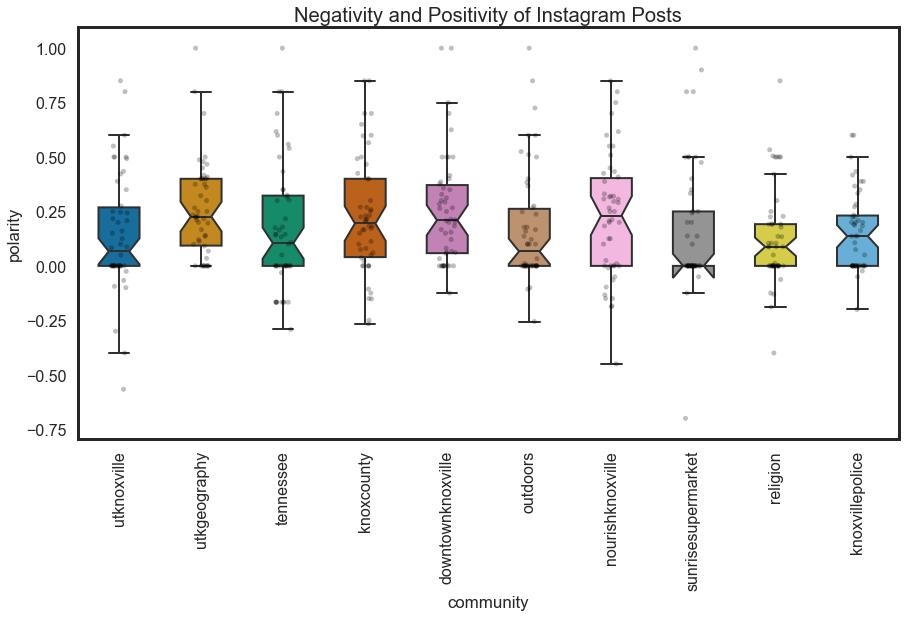

In [16]:
#style.use("seaborn-poster")
style.use("seaborn-deep")
sns.despine(offset=10, trim=True)
sns.set_style('white')

# plot boxplot with seaborn
bplot=sns.boxplot(y='polarity', x='community', 
                 data=textfile, 
                 width=0.5,
                 palette="colorblind",
                 fliersize=0, # Avoid plotting outliers twice since all individual observations will be plotted with swarmplot
                 notch=True
                 ).set_title("Negativity and Positivity of Instagram Posts")
 
# add swarmplot
bplot=sns.stripplot(y='polarity', x='community',
              data=textfile,
              jitter=True,
              color='black',
              alpha=0.25,
              marker='o',)
plt.xticks(rotation=90)
#plt.tight_layout()
plt.savefig("./Instagram/TextAnalysis/polarity.png")

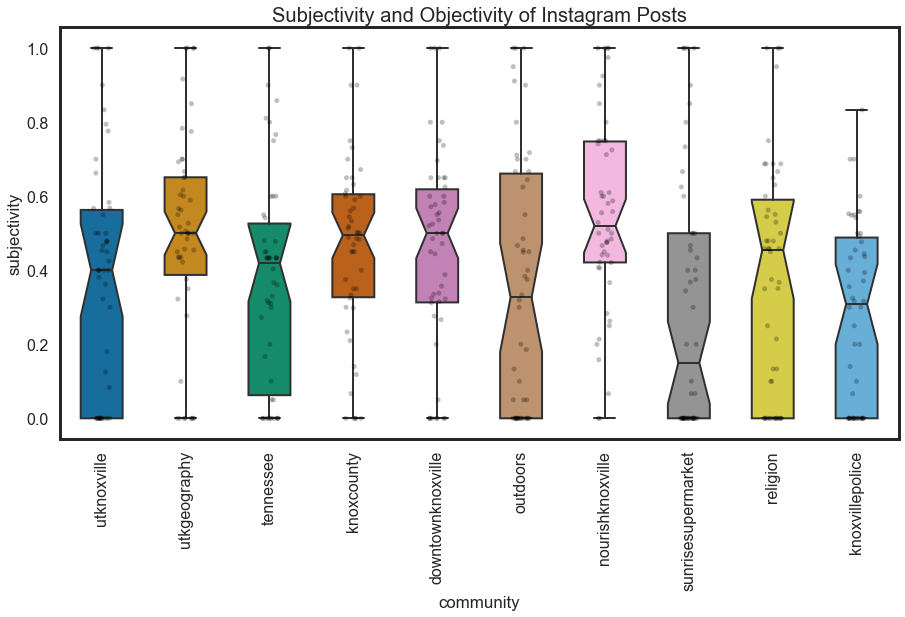

In [17]:
#style.use("seaborn-poster")
style.use("seaborn-deep")
sns.despine(offset=10, trim=True)
sns.set_style('white')

# plot boxplot with seaborn
bplot=sns.boxplot(y='subjectivity', x='community', 
                 data=textfile, 
                 width=0.5,
                 palette="colorblind",
                 fliersize=0, # Avoid plotting outliers twice since all individual observations will be plotted with swarmplot
                 notch=True
                 ).set_title("Subjectivity and Objectivity of Instagram Posts")
 
# add swarmplot
bplot=sns.stripplot(y='subjectivity', x='community',
              data=textfile,
              jitter=True,
              color='black',
              alpha=0.25,
              marker='o',)
plt.xticks(rotation=90)
#plt.tight_layout()
plt.savefig("./Instagram/TextAnalysis/subjectivity.png")

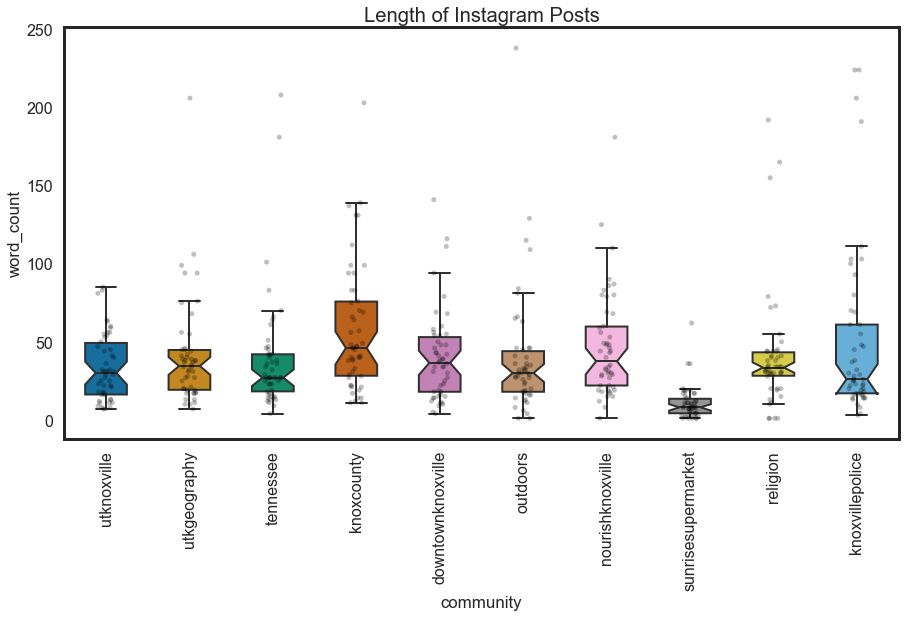

In [18]:
#style.use("seaborn-poster")
style.use("seaborn-deep")
sns.despine(offset=10, trim=True)
sns.set_style('white')

# plot boxplot with seaborn
bplot=sns.boxplot(y='word_count', x='community', 
                 data=textfile, 
                 width=0.5,
                 palette="colorblind",
                 fliersize=0, # Avoid plotting outliers twice since all individual observations will be plotted with swarmplot
                 notch=True
                 ).set_title("Length of Instagram Posts")
 
# add swarmplot
bplot=sns.stripplot(y='word_count', x='community',
              data=textfile,
              jitter=True,
              color='black',
              alpha=0.25,
              marker='o',)
plt.xticks(rotation=90)
#plt.tight_layout()
plt.savefig("./Instagram/TextAnalysis/wordcount.png")

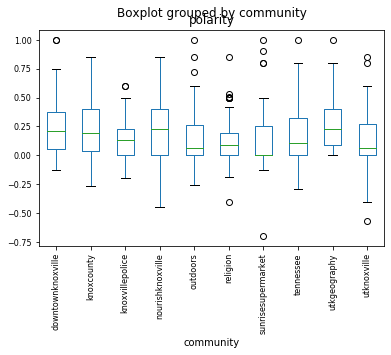

In [124]:
boxplot = textfile.boxplot(column=["polarity"], by="community", grid=False, rot=90, fontsize=8)

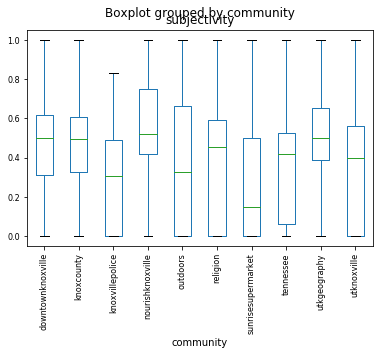

In [125]:
boxplot = textfile.boxplot(column=["subjectivity"], by="community", grid=False, rot=90, fontsize=8)

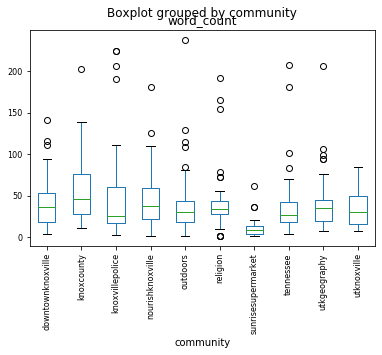

In [126]:
boxplot = textfile.boxplot(column=["word_count"], by="community", grid=False, rot=90, fontsize=8)